# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 4.6471161880233511, performing 32.0 it/sec
Step 100: Loss = 1.1132586297740927, performing 311.0 it/sec
Step 200: Loss = 1.0161384979002603, performing 533.2 it/sec
Step 300: Loss = 0.7909973854182140, performing 544.2 it/sec
Step 400: Loss = 0.5463990818905685, performing 504.9 it/sec
Step 500: Loss = 0.2505526112429186, performing 486.4 it/sec
Step 600: Loss = 0.0039626354772944, performing 401.7 it/sec
No improvement since Step 585, early stopping.
[Best]  Step 584: Loss = 0.0037818849576710
[Final] Step 634: Loss = 0.0067732534679164

predicted end states
------------------------------------
         5th       Mean      95th
TSEC-1  6.30e-01  6.30e-01  6.30e-01
TSEC-2  5.21e-09  5.31e-09  5.41e-09
TSEC-3  2.09e-08  2.10e-08  2.11e-08
TSEC-4  3.44e-06  3.44e-06  3.44e-06


predicted conditional events
---------------------------

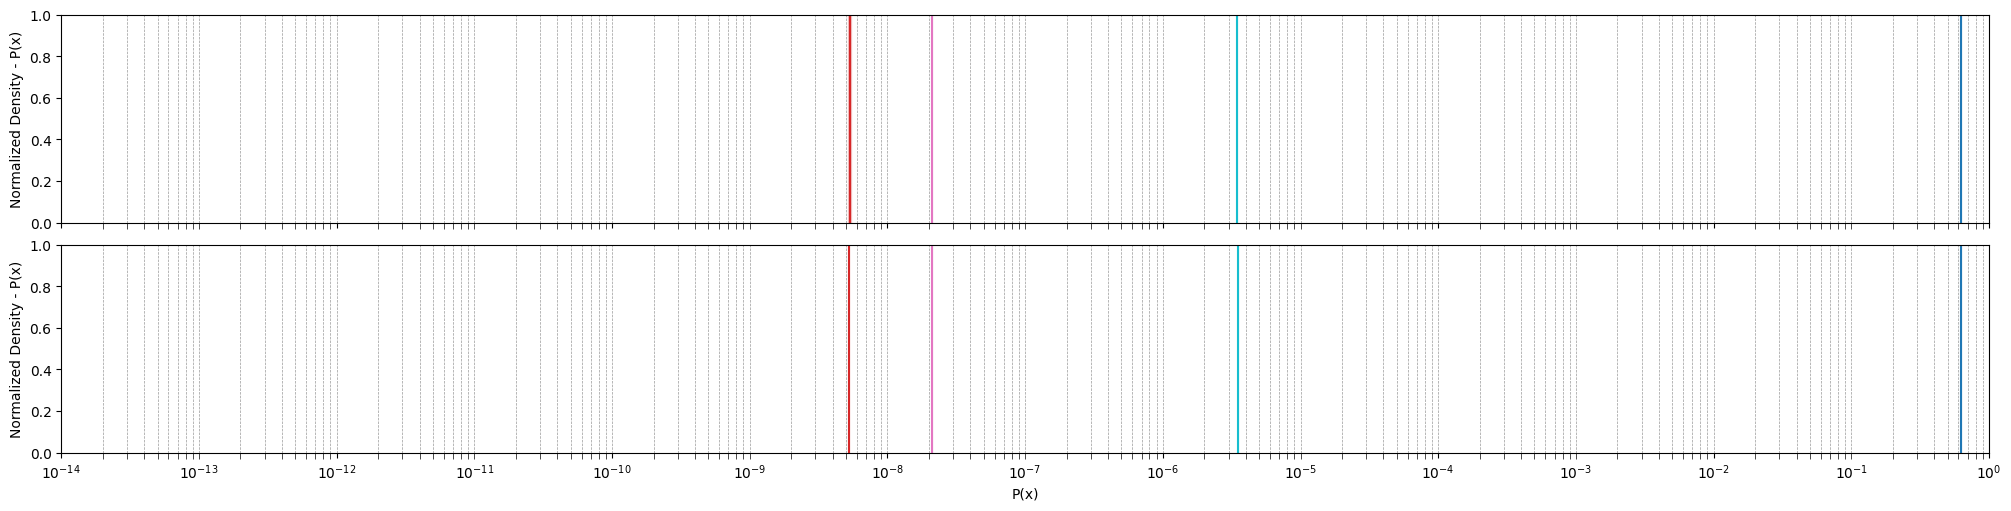

In [3]:
tunable = {
 'num_samples': 100,                    # number of monte carlo samples
 'learning_rate': 0.1,                  # the gradient update rate
 'dtype': tf.float64,                   # use 64-bit floats
 'epsilon': 1e-20,                      # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,                     # maximum steps, regardless of convergence
 'patience': 50,                        # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 6.3e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['TSEC', 'MRSS', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'TSEC-1': {
        'sequence': [1, 0, 0, 0],
        'probability': 6.30e-1,
    },
    'TSEC-2': {
        'sequence': [1, 0, 0, 1],
        'probability': 5.30e-9,
    },
    'TSEC-3': {
        'sequence': [1, 0, 1, np.nan],
        'probability': 2.10e-8,
    },
    'TSEC-4': {
        'sequence': [1, 1, np.nan, np.nan],
        'probability': 3.50e-6,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)